In [79]:
import pandas as pd
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
import random 

In [80]:
# read input file
filepath = "space_mountain.csv"
df = pd.read_csv(filepath)

In [ ]:
# one hot encode the Day of Week column
# drop_first=True is used to avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['Day of Week']) 

In [82]:
# ------ SPLITTING DATASET ------
# train on 2014 (December), 2015, 2016, 2017, 2018, 2019, 2022 (excluding COVID years)
# test on 2023, 2024, 2025 (January - March)
train_years = ['14', '15', '16', '17', '18', '19', '22']
test_years = ['23', '24', '25']

df['Year'] = df['Date'].apply(lambda x: x.split('/')[-1])  # Extract year as a string
df = df[df['Time of Day'] >= 450]
df['Time_sq'] = df['Time of Day'] ** 2
df['Time_sin'] = np.sin(2 * np.pi * df['Time of Day'] / 1440)
df['Time_cos'] = np.cos(2 * np.pi * df['Time of Day'] / 1440)

train_df = df[df['Year'].isin(train_years)]  # Filter rows where Year is in train_years
test_df = df[df['Year'].isin(test_years)]  # Filter rows where Year is in train_years

train_df.shape, test_df.shape

((50962, 16), (19503, 16))

In [ ]:
# getting datasets
y_train = train_df['Wait Time'].values
X_train = train_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year', 'Month'])
y_test = test_df['Wait Time'].values
X_test = test_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year', 'Month'])

print("X_train:")
print(X_train.head())

print("\ny_train (first 10):")
print(y_train[:10])

print("\nX_test:")
print(X_test.head())

print("\ny_test (first 10):")
print(y_test[:10])

X_train:
   Time of Day  Day of Week_Friday  Day of Week_Monday  Day of Week_Saturday  \
1          450               False               False                  True   
2          480               False               False                  True   
3          510               False               False                  True   
4          540               False               False                  True   
5          570               False               False                  True   

   Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
1               False                 False                False   
2               False                 False                False   
3               False                 False                False   
4               False                 False                False   
5               False                 False                False   

   Day of Week_Wednesday  Time_sq  Time_sin  Time_cos  
1                  False   202500  0.923880 -

In [ ]:
# create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([12.89600842, 21.44039836, 28.79568769, ..., 56.82136729,
       55.20508978, 52.99797572])

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: {}".format(rmse))

RMSE: 17.388268014443522


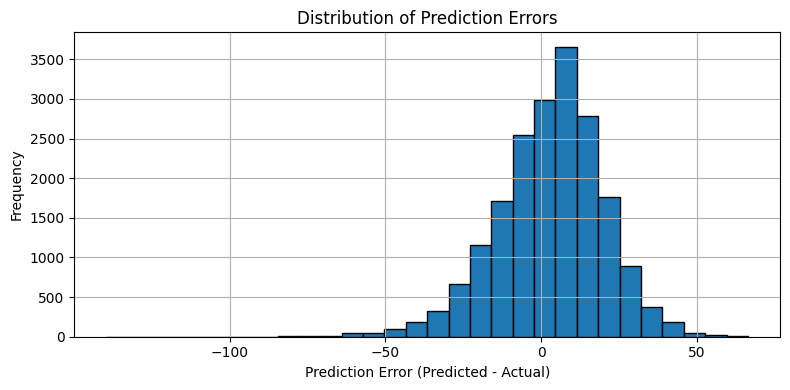

In [86]:
errors = np.array(y_pred) - np.array(y_test)

plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

